# XGBoost sample efficiency

- This notebooks assesses the accuracy of XGBoost-based precipitation retrieval with respect to the training data size.

In [1]:
# Running this notebook requires the xgboost package. Uncomment the following line to install it.
#!pip install xgboost

In [2]:
import ipwgml
from ipwgml.data import download_dataset
import hdf5plugin
import xarray as xr

files = download_dataset("spr", "gmi", "gmi", "training", "on_swath", "tabular")
#input_data = xr.load_dataset(files["gmi"][0], engine="h5netcdf")
target_data = xr.load_dataset(files["target"][0], engine="h5netcdf")
#x = input_data.observations.data
y = target_data.surface_precip.data

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



In [3]:
from ipwgml.evaluation import Evaluator
                            

def run_retrieval(input_data):
    input_data = input_data.transpose("batch", "channels_gmi")
    obs = input_data.obs_gmi.data
    surface_precip = rf_regressor.predict(obs)
    return xr.Dataset({
        "surface_precip": (("samples",), surface_precip)
    })


In [6]:
pip install xgboost

  Using cached xgboost-2.1.2-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.2-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
from xgboost import XGBRegressor
n_samples = x.shape[0]

sizes = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
results = []
n_repeats = 5

for size in sizes:
    results.append([])
    for repeat in range(n_repeats):
        x_train, _, y_train, _ = train_test_split(
            x, y, train_size=size, test_size=1.0 - size
        )
        rf_regressor = XGBRegressor(n_estimators=1_000, max_depth=10, random_state=2, n_jobs=16)
        rf_regressor.fit(x_train, y_train)
    
        evaluator = Evaluator(
            reference_sensor="gmi",
            geometry="on_swath",
            retrieval_input=["gmi"],
        )
        evaluator.evaluate(run_retrieval, input_data_format="tabular", batch_size=4096)
        results[-1].append(evaluator.get_results())
    results[-1] = xr.concat(results[-1], dim="repeats")
    


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


Output()

/home/simon/miniconda3/envs/at652/lib/python3.11/site-packages/ipwgml/metrics.py:672: RuntimeWarning: divide by zero encountered in divide
  scales = 0.5 * (N - 1) * self.scale / n


In [9]:
results.size

<xarray.DataArray 'size' (size: 6)> Size: 48B
array([0, 1, 2, 3, 4, 5])
Dimensions without coordinates: size

In [8]:
results = xr.concat(results, dim="size")
results.to_netcdf("xgboost_sample_efficiency.nc")

In [3]:
results_nn = xr.load_dataset("neural_network_sample_efficiency.nc")
results_xgboost = xr.load_dataset("xgboost_sample_efficiency.nc")

In [17]:
results_xgboost

<xarray.Dataset> Size: 105kB
Dimensions:                 (size: 6, repeats: 5, scales: 16, threshold: 100,
                             threshold_heavy: 100)
Coordinates:
  * scales                  (scales) float64 128B inf 0.558 ... 0.03986 0.0372
  * threshold               (threshold) float64 800B 0.0 0.0101 ... 0.9899 1.0
  * threshold_heavy         (threshold_heavy) float64 800B 0.0 0.0101 ... 1.0
  * size                    (size) float64 48B 9.37e+06 2.811e+07 ... 9.276e+07
Dimensions without coordinates: repeats
Data variables: (12/19)
    bias                    (size, repeats) float64 240B -3.322 ... -4.629
    mae                     (size, repeats) float64 240B 0.1292 ... 0.1228
    mse                     (size, repeats) float64 240B 1.575 1.552 ... 1.518
    smape                   (size, repeats) float64 240B 97.38 97.33 ... 91.84
    correlation_coef        (size, repeats) float64 240B 0.5983 ... 0.6156
    spectral_coherence      (size, repeats, scales) float64 4kB 0.9301 ... 0....
    ...                      ...
    pod_heavy               (size, repeats) float64 240B nan nan nan ... nan nan
    far_heavy               (size, repeats) float64 240B nan nan nan ... nan nan
    hss_heavy               (size, repeats) float64 240B nan nan nan ... nan nan
    precision_heavy         (size, repeats, threshold_heavy) float64 24kB nan...
    recall_heavy            (size, repeats, threshold_heavy) float64 24kB nan...
    area_under_curve_heavy  (size, repeats) float64 240B 0.0 0.0 0.0 ... 0.0 0.0

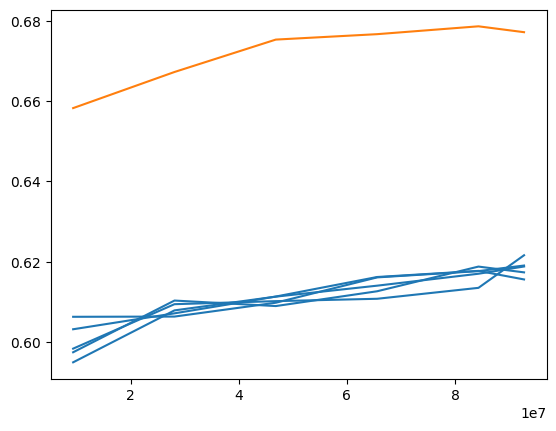

In [7]:
import matplotlib.pyplot as plt
import numpy as np
sizes = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
results_xgboost["size"] = (("size",), np.array(sizes) * target_data.samples.size)
results_nn["size"] = (("size",), np.array(sizes) * target_data.samples.size)


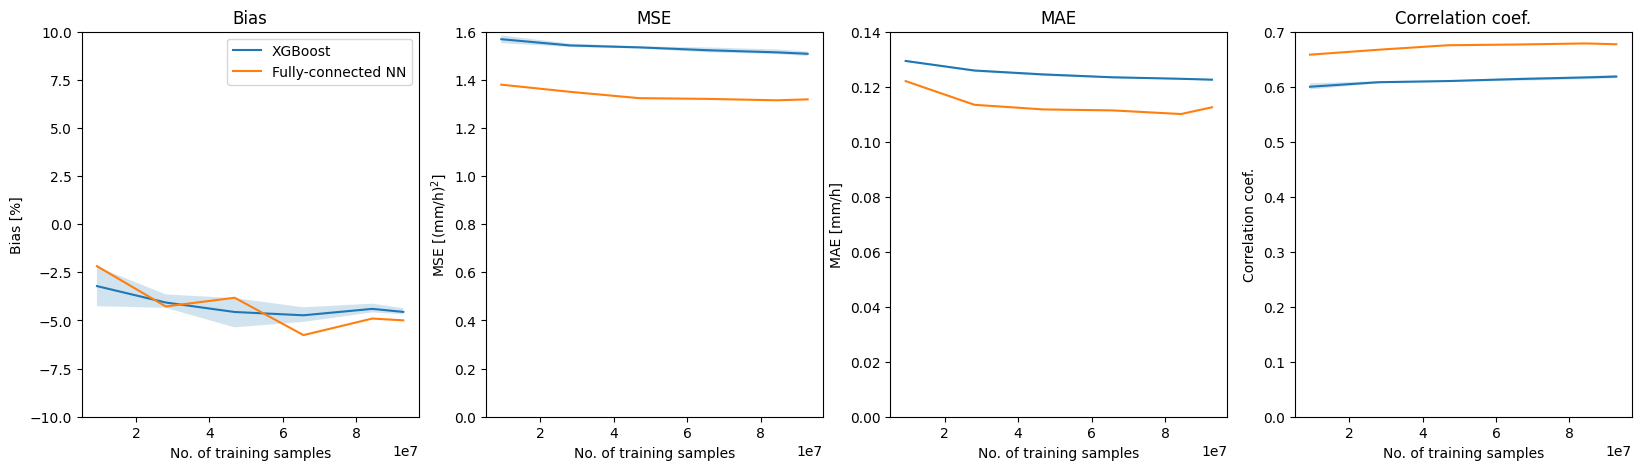

In [43]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

ax = axs[0]
ax.set_title("Bias")
ax.fill_between(results_xgboost.size, y1=results_xgboost.bias.min("repeats"), y2=results_xgboost.bias.max("repeats"), alpha=0.2)
ax.plot(results_xgboost.size, results_xgboost.bias.mean("repeats"), c="C0", label="XGBoost")
ax.plot(results_nn.size, results_nn.bias.mean("repeats"), c="C1", label="Fully-connected NN")
ax.legend()
ax.set_xlabel("No. of training samples")
ax.set_ylim(-10, 10)
ax.set_ylabel("Bias [%]")

ax = axs[1]
ax.set_title("MSE")
ax.fill_between(results_xgboost.size, y1=results_xgboost.mse.min("repeats"), y2=results_xgboost.mse.max("repeats"), alpha=0.2)
ax.plot(results_xgboost.size, results_xgboost.mse.mean("repeats"), c="C0")
ax.plot(results_nn.size, results_nn.mse.mean("repeats"), c="C1")
ax.set_xlabel("No. of training samples")
ax.set_ylabel("MSE [(mm/h)$^2$]")
ax.set_ylim(0, 1.6)

ax = axs[2]
ax.set_title("MAE")
ax.fill_between(results_xgboost.size, y1=results_xgboost.mae.min("repeats"), y2=results_xgboost.mae.max("repeats"), alpha=0.2)
ax.plot(results_xgboost.size, results_xgboost.mae.mean("repeats"), c="C0")
ax.plot(results_nn.size, results_nn.mae.mean("repeats"), c="C1")
ax.set_xlabel("No. of training samples")
ax.set_ylabel("MAE [mm/h]")
ax.set_ylim(0, 0.14)

ax = axs[3]
ax.set_title("Correlation coef.")
ax.fill_between(results_xgboost.size, y1=results_xgboost.correlation_coef.min("repeats"), y2=results_xgboost.correlation_coef.max("repeats"), alpha=0.2)
ax.plot(results_xgboost.size, results_xgboost.correlation_coef.mean("repeats"), c="C0")
ax.plot(results_nn.size, results_nn.correlation_coef.mean("repeats"), c="C1")
ax.set_xlabel("No. of training samples")
ax.set_ylabel("Correlation coef.")
ax.set_ylim(0, 0.7)

fig.savefig("../../figures/mlp_retrieval_metrics.png", dpi=200)


In [20]:
import matplotlib.pyplot as plt
plt.plot(results.correlation_coef)

AttributeError: 'list' object has no attribute 'correlation_coef'

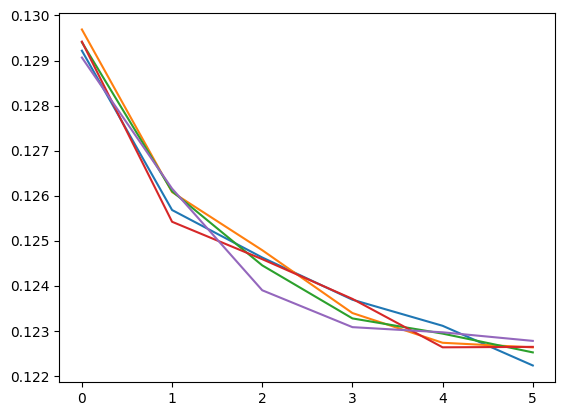

In [10]:
import matplotlib.pyplot as plt
plt.plot(results.mae)

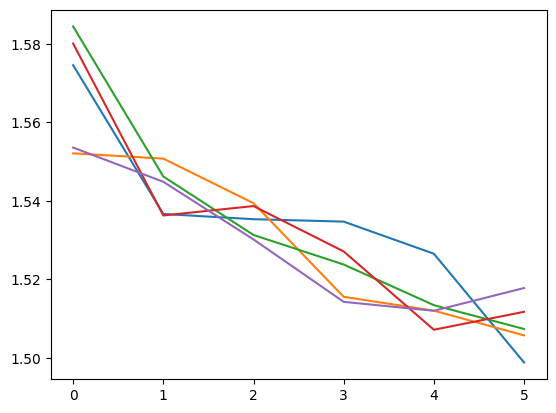

In [11]:
import matplotlib.pyplot as plt
plt.plot(results.mse)

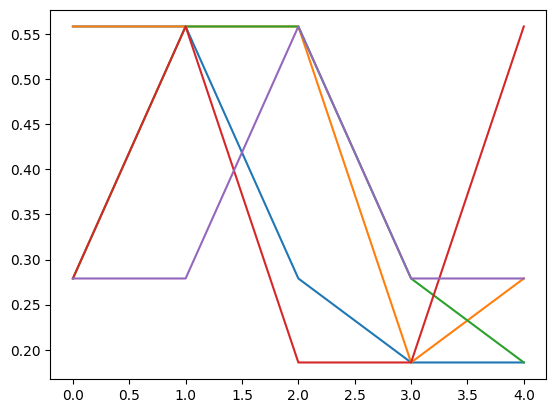

In [13]:
import matplotlib.pyplot as plt
plt.plot(results.effective_resolution)